In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

df = pd.DataFrame({
    'Time' : [1,1,1,1,2,2,2,2],                   
    'A_X' : [5, 5, 6, 6, 4, 3, 3, 4], 
    'A_Y' : [5, 6, 6, 5, 5, 6, 5, 6],                         
        })


https://stackoverflow.com/questions/64241975/plot-delaney-triangulation-grouped-by-value

In [2]:
def make_points(x):
    return np.array(list(zip(x['A_X'], x['A_Y'])))

In [3]:
def make_triangulation(x):
    return Delaunay(np.array(list(zip(x['A_X'], x['A_Y']))))

In [4]:
df.groupby("Time").agg({'A_X': list, 'A_Y': list})

,A_X,A_Y
Time,,
1,"[5, 5, 6, 6]","[5, 6, 6, 5]"
2,"[4, 3, 3, 4]","[5, 6, 5, 6]"


In [5]:
b = df.groupby("Time").apply(make_points)
b

Time
1    [[5, 5], [5, 6], [6, 6], [6, 5]]
2    [[4, 5], [3, 6], [3, 5], [4, 6]]
dtype: object

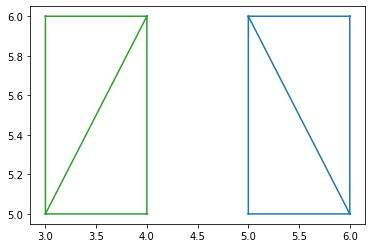

In [6]:
fig, axe = plt.subplots()
for p in b:
    tri = Delaunay(p)
    axe.triplot(*p.T, tri.simplices)

In [7]:
c = df.groupby("Time").apply(make_triangulation)
c

Time
1    <scipy.spatial.qhull.Delaunay object at 0x7fc0...
2    <scipy.spatial.qhull.Delaunay object at 0x7fc0...
dtype: object

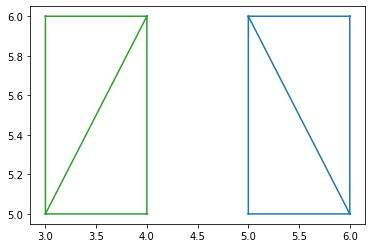

In [8]:
fig, axe = plt.subplots()
for tri in c:
    axe.triplot(*tri.points.T, tri.simplices)